In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import csv
import IPython.display as ipd
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Keras
import keras
from keras import models
from keras import layers
from tensorflow.keras.models import Sequential
import tensorflow as tf

In [2]:
# reading dataset from csv
stat = 'abnormal normal'.split()
data_origin = pd.read_csv('data.csv')
data_origin.head()

filename  chroma_stft      rmse  spectral_centroid  spectral_bandwidth  \
0  00000059.wav     0.332487  0.012099        1180.264031         1579.000699   
1  00000071.wav     0.497902  0.013013        1036.513080         1375.484191   
2  00000065.wav     0.325402  0.012418        1271.447206         1735.250822   
3  00000273.wav     0.474146  0.010462        1050.479779         1347.219254   
4  00000267.wav     0.329252  0.009813        1414.325444         1763.148493   

       rolloff  zero_crossing_rate       mfcc1       mfcc2      mfcc3  ...  \
0  2220.767700            0.049593 -383.320099  177.115570 -30.398434  ...   
1  2200.808270            0.037650 -370.949249  186.253677 -39.915035  ...   
2  2644.712005            0.049436 -376.357697  167.325989 -21.110481  ...   
3  2201.532705            0.044327 -381.908417  190.770233 -44.368759  ...   
4  3041.902178            0.066287 -371.388824  164.614594 -29.966749  ...   

     mfcc12     mfcc13     mfcc14     mfcc15     mfcc16     mfcc17    mfcc18  \
0  9.741944  17.725454  -5.918385  10.031418 -17.544346   7.334301 -7.061300   
1 -2.551307   6.779550  -5.985898   7.088058  -6.116435   8.007307 -1.762496   
2 -3.114837   8.503551  -5.267240  17.415310  -7.076010  16.206793 -4.685070   
3 -3.054621   7.736747  -4.699168   8.208503  -6.886340   6.885895 -3.381184   
4 -4.580791  -2.014683 -10.503709  15.157179  -7.044686  18.311527 -1.110782   

      mfcc19     mfcc20     label  
0  10.523767   3.254827  abnormal  
1   2.309028  -1.095314  abnormal  
2   0.707447 -11.416034  abnormal  
3   1.034102  -2.435584  abnormal  
4   9.126927 -10.090671  abnormal  

[5 rows x 28 columns]

In [3]:
# Dropping unneccesary columns
data = data_origin.drop(['filename'],axis=1)
data.head()

chroma_stft      rmse  spectral_centroid  spectral_bandwidth      rolloff  \
0     0.332487  0.012099        1180.264031         1579.000699  2220.767700   
1     0.497902  0.013013        1036.513080         1375.484191  2200.808270   
2     0.325402  0.012418        1271.447206         1735.250822  2644.712005   
3     0.474146  0.010462        1050.479779         1347.219254  2201.532705   
4     0.329252  0.009813        1414.325444         1763.148493  3041.902178   

   zero_crossing_rate       mfcc1       mfcc2      mfcc3      mfcc4  ...  \
0            0.049593 -383.320099  177.115570 -30.398434  43.175838  ...   
1            0.037650 -370.949249  186.253677 -39.915035  60.632931  ...   
2            0.049436 -376.357697  167.325989 -21.110481  45.520454  ...   
3            0.044327 -381.908417  190.770233 -44.368759  61.062859  ...   
4            0.066287 -371.388824  164.614594 -29.966749  51.685932  ...   

     mfcc12     mfcc13     mfcc14     mfcc15     mfcc16     mfcc17    mfcc18  \
0  9.741944  17.725454  -5.918385  10.031418 -17.544346   7.334301 -7.061300   
1 -2.551307   6.779550  -5.985898   7.088058  -6.116435   8.007307 -1.762496   
2 -3.114837   8.503551  -5.267240  17.415310  -7.076010  16.206793 -4.685070   
3 -3.054621   7.736747  -4.699168   8.208503  -6.886340   6.885895 -3.381184   
4 -4.580791  -2.014683 -10.503709  15.157179  -7.044686  18.311527 -1.110782   

      mfcc19     mfcc20     label  
0  10.523767   3.254827  abnormal  
1   2.309028  -1.095314  abnormal  
2   0.707447 -11.416034  abnormal  
3   1.034102  -2.435584  abnormal  
4   9.126927 -10.090671  abnormal  

[5 rows x 27 columns]

In [4]:
sound_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(sound_list)

In [5]:
# normalizing
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [6]:
# spliting of dataset into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
# creating a basic model
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(2, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               6912      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 130       
Total params: 48,194
Trainable params: 48,194
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(X_train, y_train, epochs=40, batch_size=128)

Epoch 1/40
9/9 [==============================] - 10s 2ms/step - loss: 0.5911 - accuracy: 0.7393
Epoch 2/40
9/9 [==============================] - 0s 1ms/step - loss: 0.5017 - accuracy: 0.8027
Epoch 3/40
9/9 [==============================] - 0s 1ms/step - loss: 0.4272 - accuracy: 0.8326
Epoch 4/40
9/9 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8357
Epoch 5/40
9/9 [==============================] - 0s 1ms/step - loss: 0.3953 - accuracy: 0.8422
Epoch 6/40
9/9 [==============================] - 0s 1ms/step - loss: 0.3777 - accuracy: 0.8476
Epoch 7/40
9/9 [==============================] - 0s 1ms/step - loss: 0.3989 - accuracy: 0.8313
Epoch 8/40
9/9 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8420
Epoch 9/40
9/9 [==============================] - 0s 1ms/step - loss: 0.3692 - accuracy: 0.8520
Epoch 10/40
9/9 [==============================] - 0s 2ms/step - loss: 0.3359 - accuracy: 0.8633
Epoch 11/40
9/9 [=====================

In [9]:
# calculate accuracy
test_loss, test_acc = model.evaluate(X_test,y_test)
print('test_acc: ',test_acc)

9/9 [==============================] - 0s 909us/step - loss: 0.7420 - accuracy: 0.7993
test_acc:  0.7992957830429077


In [34]:
# predictions
file_no = 6
predictions = model.predict(X_test[file_no:(file_no+1)])
pred = np.argmax(predictions[0])

In [35]:
# predicted genre
name = '00000000.wav'
pred_path = './dataset/fan/id_00/' + str(stat[pred]) + '/' + name

print('Predicted Genre: ', stat[pred])
ipd.Audio(pred_path)

Predicted Genre:  abnormal


In [36]:
# actual genre
res = y_test[file_no]
print('Actual Genre: ',stat[res])
value = np.where(X == X_test[file_no:(file_no+1)])
new = data_origin.to_numpy()
name = new[value[0][0]][0]

act_path = './dataset/fan/id_00/' + str(stat[res]) + '/' + name
ipd.Audio(act_path)

Actual Genre:  abnormal


In [13]:
# Make a set of predictions for the validation data
pred = np.argmax(model.predict(X_train),axis=1)
conf = confusion_matrix(y_train, pred)


# Print performance details
print(classification_report(y_train, pred))
print("Confusion matrix")
print(conf)

              precision    recall  f1-score   support

           0       0.99      0.84      0.91       308
           1       0.94      1.00      0.97       826

    accuracy                           0.95      1134
   macro avg       0.97      0.92      0.94      1134
weighted avg       0.96      0.95      0.95      1134

Confusion matrix
[[259  49]
 [  3 823]]


In [14]:
y_pred_proba = model.predict(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
roc_auc = auc(fpr, tpr)

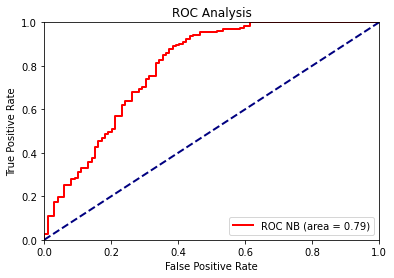

In [15]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw, label='ROC NB (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Analysis')
plt.legend(loc="lower right")
plt.show()

In [1]:
import tensorflow as tf
tf.compat.v1.disable_v2_behavior()


class LSTMAutoencoder():
    def __init__(self, batchsize, window_width, encoder_layer_list, decoder_layer_list, num_class=1):
        self.window_width = window_width
        self.encoder_layer_list = encoder_layer_list
        self.decoder_layer_list = decoder_layer_list
        self.num_class = num_class
        self.batchsize = batchsize
        self.decode_without_input = False
        self.optimizer = None
        self.reverse = None
        self.output_enc = None
        self.output_dec = None

        self.lstm_cell_enc = [tf.compat.v1.nn.rnn_cell.LSTMCell(
            size) for size in encoder_layer_list]
        self.multi_rnn_enc_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(
            self.lstm_cell_enc)
        self.initial_state_enc = self.multi_rnn_enc_cell.zero_state(
            self.batchsize, dtype=tf.float32)

        self.lstm_cell_dec = [tf.compat.v1.nn.rnn_cell.LSTMCell(
            size) for size in decoder_layer_list]
        self.multi_rnn_dec_cell = tf.compat.v1.nn.rnn_cell.MultiRNNCell(
            self.lstm_cell_dec)
        self.initial_state_dec = self.multi_rnn_dec_cell.zero_state(
            self.batchsize, dtype=tf.float32)

        self.x_placeholder = tf.compat.v1.placeholder(
            tf.float32, [self.batchsize, self.window_width, self.num_class])
        self.y_placeholder = tf.compat.v1.placeholder(
            tf.float32, [self.batchsize, self.window_width, self.num_class])

        self.encoder()
        self.decoder()

    def encoder(self):
        with tf.compat.v1.variable_scope('encoder') as encoder:
            self.output_enc, self.initial_state_enc = tf.compat.v1.nn.dynamic_rnn(cell=self.multi_rnn_enc_cell,
                                                                        inputs=self.x_placeholder,
                                                                        initial_state=self.initial_state_enc,
                                                                        dtype=tf.float32, time_major=False)

        # fc_output = tf.layer

    def decoder(self):
        with tf.compat.v1.variable_scope('decoder') as decoder:

            if self.decode_without_input:
                dec_inputs = [tf.zeros(tf.shape(input=self.batchsize, name=self.window_width, out_type=self.num_class),
                                       dtype=tf.float32)]

                self.output_dec, self.initial_state_dec = tf.compat.v1.nn.dynamic_rnn(cell=self.multi_rnn_dec_cell,
                                                                            inputs=dec_inputs,
                                                                            initial_state=self.initial_state_enc,
                                                                            dtype=tf.float32, time_major=False)

                if self.reverse:
                    self.output_dec = self.output_dec[::-1]
            else:

                self.output_dec, self.initial_state_dec = tf.compat.v1.nn.dynamic_rnn(cell=self.multi_rnn_dec_cell,
                                                                            inputs=self.output_enc,
                                                                            initial_state=self.initial_state_enc,
                                                                            dtype=tf.float32, time_major=False)
            self.output_dense_dec = tf.compat.v1.layers.dense(
                self.output_dec, self.num_class, name="dense_output")

            self.loss = tf.reduce_mean(
                input_tensor=tf.square(self.y_placeholder - self.output_dense_dec))

            if self.optimizer is None:
                self.train = tf.compat.v1.train.AdamOptimizer().minimize(self.loss)
            else:
                self.train = self.optimizer.minimize(self.loss)

            tf.compat.v1.summary.scalar("mini_batch_loss", self.loss)
            self.merged = tf.compat.v1.summary.merge_all()


ModuleNotFoundError: No module named 'tensorflow.contrib'

In [4]:
batchsize = 100
window_width = 16000
encoder_layer_list = [15, 15, 15, 15]
decoder_layer_list = [15, 15, 15, 15]

model = LSTMAutoencoder(batchsize, window_width,
                          encoder_layer_list, decoder_layer_list)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/layers/legacy_rnn/rnn_cell_impl.py:909: UserWarning: `tf.nn.rnn_cell.LSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  warnings.warn("`tf.nn.rnn_cell.LSTMCell` is deprecated and will be "
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/base_layer_v1.py:1700: UserWarning: `layer.add_variable` is deprecated and will be removed in a future version. Please use `layer.add_weight` method instead.
  warnings.warn('`layer.add_variable` is deprecated and '
/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/legacy_tf_layers/core.py:171: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  warnings.warn('`tf.layers.dense` is deprecated and '
/opt/anaconda3/lib/python3.7/site-packages/tensorflo

In [6]:
model.summary()

AttributeError: 'LSTMAutoencoderV2' object has no attribute 'summary'